<a href="https://colab.research.google.com/github/oimartin/Older-and-Wiser/blob/relational/relational_cstick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Injest Data

data source: https://www.kaggle.com/datasets/laavanya/elderly-fall-prediction-and-detection?select=IFIP-IoT_2021_cStick-Elderly-Fall-Prediction.pdf

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/oimartin/Older-and-Wiser/relational/data/cStick.csv')
display(data.info())
print("")
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB


None

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,28.694527,0.988720,95.657002,72.909243,83.563649,0.661599,0.988720
std,23.773644,0.815918,17.576499,46.940110,11.111592,0.473282,0.815918
min,0.000000,0.000000,60.000000,10.000000,60.000000,0.000000,0.000000
25%,7.642500,0.000000,82.418000,40.230000,75.285000,0.000000,0.000000
50%,20.560000,1.000000,97.238000,69.960000,85.280000,1.000000,1.000000
75%,55.205500,2.000000,109.695000,77.612500,92.692500,1.000000,2.000000
max,69.981000,2.000000,124.980000,179.293000,99.990000,1.000000,2.000000


# Organize Data

In [3]:
data.iloc[:, -1] = data.iloc[:, -1].replace(to_replace={0: 'No Fall Detected',
                                            1: 'Person Slipped/Tripped/Prediction of Fall',
                                            2: 'Definite Fall'})

In [4]:
data.isna().value_counts()

Distance  Pressure  HRV    Sugar level  SpO2   Accelerometer  Decision 
False     False     False  False        False  False          False        2039
dtype: int64

# Graphs

In [5]:
colors = {'No Fall Detected': '#ABB9D4',
          'Person Slipped/Tripped/Prediction of Fall':'#FA8E89',
           'Definite Fall':'#FA0500' }

In [6]:
fig = px.scatter_matrix(data,
                        dimensions=["Distance", "Pressure", "HRV",
                                    "Sugar level", 'SpO2', 'Accelerometer'],
                        color="Decision ",
                        color_discrete_map=colors,
                        width=1600, height = 800)

fig.update_layout(template="plotly_white")
fig.show()

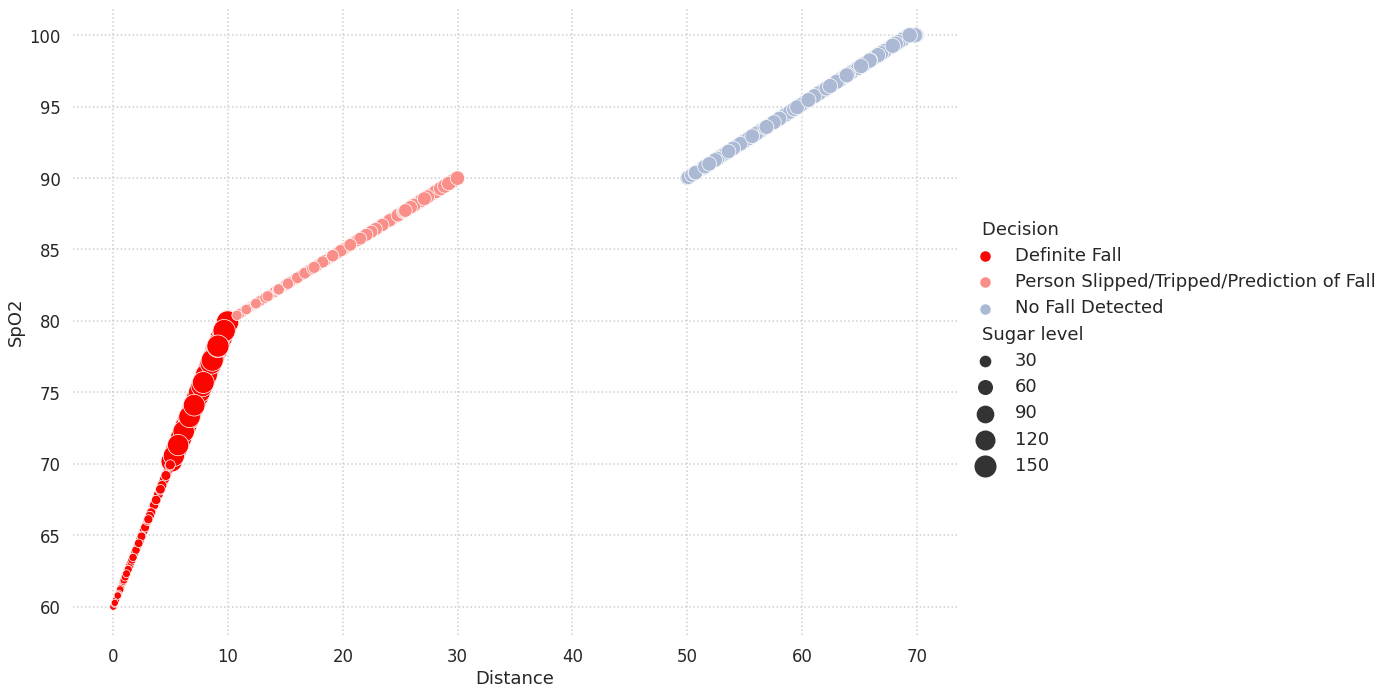

In [12]:
sns.set_style("whitegrid", {"grid.linestyle": ":"})

sns.relplot(data=data, x='Distance', y='SpO2', hue='Decision ',
            size='Sugar level', sizes=(50,500), hue_order=['Definite Fall',
                                                           'Person Slipped/Tripped/Prediction of Fall',
                                                           'No Fall Detected'],
            palette={'#FA0500','#FA8E89','#ABB9D4'},height=10, aspect=11.7/8.27)

sns.despine(left=True, bottom=True)
sns.set_context('talk')
plt.savefig('Distance_SpO2_sizeSugar.png')